Import Library yang Dibutuhkan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

Load Dataset

In [7]:
df = pd.read_csv('MODUL 1_CODELAB.csv', encoding='latin1')

df.head(10)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
5,Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.824893,68499.85162,14179.472440,428485.3604,56611.99784
6,Griffin Rivera,vehicula@at.co.uk,Syria,1,46.607315,39814.52200,5958.460188,326373.1812,28925.70549
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,1,50.193016,51752.23445,10985.696560,629312.4041,47434.98265
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,0,46.584745,58139.25910,3440.823799,630059.0274,48013.61410
9,Rhonda Chavez,nec@nuncest.com,Somalia,1,43.323782,53457.10132,12884.078680,476643.3544,38189.50601


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [9]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


Preprocessing Data

In [10]:
df2=df.drop(columns={'customer name', 'customer e-mail', 'country', 'gender'}, inplace=False)
df2.head(5)

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [11]:
X = df2.drop('car purchase amount', axis=1)
y = df2['car purchase amount']


Standarisasi Data

In [12]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

y = scaler.fit_transform(y.values.reshape(-1, 1))

Splitting Data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test :", X_test.shape)
print("y_test :", y_test.shape)

X_train: (400, 4)
y_train: (400, 1)
X_test : (100, 4)
y_test : (100, 1)


Buat Model

In [14]:
model = Sequential([
    Dense(10, activation='relu', input_dim=X_train.shape[1]),  # layer 1
    Dense(10, activation='relu'),                              # layer 2
    Dense(1, activation='linear')                              # layer output
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


Training Model

In [15]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
10/10 [==============================] - 1s 18ms/step - loss: 0.2410 - val_loss: 0.2076
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1779 - val_loss: 0.1504
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1267 - val_loss: 0.1035
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0844 - val_loss: 0.0678
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0524 - val_loss: 0.0443
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0330 - val_loss: 0.0323
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0243 - val_loss: 0.0286
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0214 - val_loss: 0.0276
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0208 - val_loss: 0.0262
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0199 - val_loss: 0.0246
Epoch 11

Evaluasi Model

In [16]:
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
#print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.0000


In [17]:
# Prediksi hasil
y_pred = model.predict(X_test)

# Tambahan metrik regresi
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(loss)
r2 = r2_score(y_test, y_pred)

print(f"Test MAE : {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²  : {r2:.4f}")

4/4 [==============================] - 0s 1ms/step
Test MAE : 0.0031
Test RMSE: 0.0064
Test R²  : 0.9983


Plotting Akurasi dan Loss dari Training dan Validation

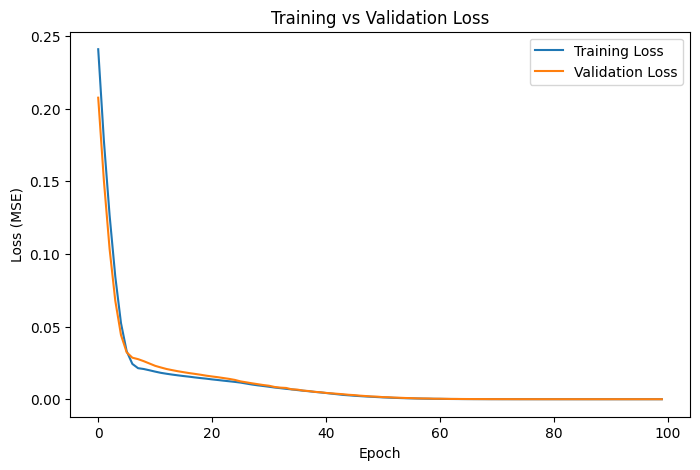

In [18]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()